## Analysis of Glassdoor's 50 best jobs in America for 2019

The following analysis is based on [Glassdoor's 50 best jobs](https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm?utm_source=newsletter&utm_medium=email&utm_content=bestjobs19&utm_campaign=jan19_us). A preview of the list is given below.
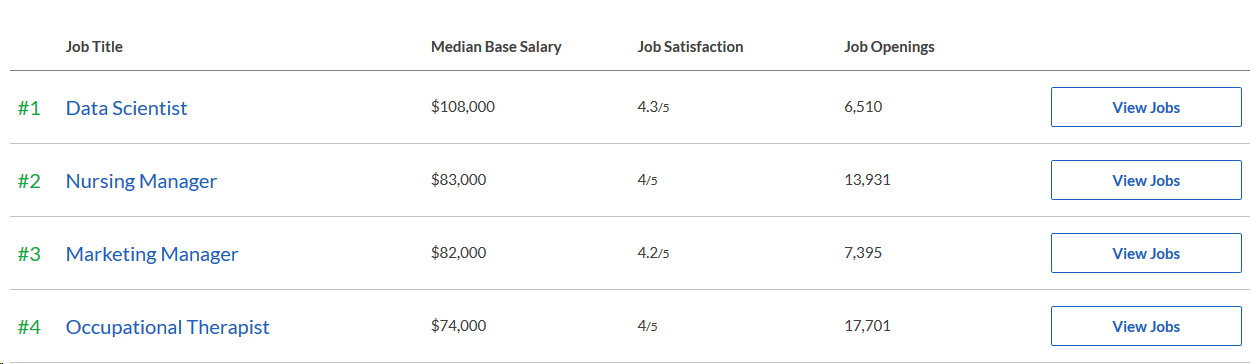
Fig. 1: Glassdoor's 50 best jobs

This data is copied and saved as [GlassDoorData.txt](https://raw.githubusercontent.com/htutk/glassdoorAnalysis/master/GlassDoorData.txt). A preview of this text file is shown below. 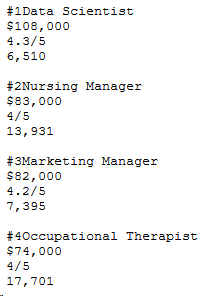
Fig. 2: Glassdoor data in txt file

### Code required to analyze

In [1]:
# setting up the environment
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen
import re #regex will be needed to extract the txt data

The following regular expressions are required to extract the data from glassdoor txt file.

In [2]:
# regular expressions to find the strings
jobRegex = re.compile(r'#\d+(.*)')
salaryRegex = re.compile(r'\$(.*)')
ratingRegex = re.compile(r'(\d\.?\d?)/5')

We can now extract the data from the text file and store them to manipulate and visualize. To do so, we need four different lists: *jobs, salaries, ratings, and jobOpening*. All of them will be lists of type **float**, except *jobs* which is a list of **Strings**. 

In [3]:
# total number of jobs
numberOfJobs = 50

# data is stored in GlassDoorData.txt
tempTxt = urlopen('https://raw.githubusercontent.com/htutk/glassdoorAnalysis/master/GlassDoorData.txt')
tempTxt = tempTxt.readlines()

txt = []
for line in tempTxt:
    txt.append(line.decode('ascii'))  #readlines return binary-string values

# Initializing lists
jobs, salaries, ratings, jobOpenings = [], [], [], []

# retrieving data
count = 0
while count <= len(txt):
    jobMo = jobRegex.search(txt[count])
    jobs.append(jobMo.group(1))

    salaryMo = salaryRegex.search(txt[count+1])
    salary = salaryMo.group(1)
    salary = ''.join(salary.split(','))
    salaries.append(float(salary))

    ratingMo = ratingRegex.search(txt[count+2])
    ratings.append(float(ratingMo.group(1)))

    jobOpening = txt[count+3].rstrip()
    jobOpening = ''.join(jobOpening.split(','))
    jobOpenings.append(int(jobOpening))
    
    count += 5  # go to the next fifth line (every job has five lines each)

The following function converts a float number to a standard dollar-representation and returns it as a String. It will be used when defining the ticks of the x-axis on the graph for salaries.

In [4]:
# given a float number, converts to a string with dollar sign
# ex: num2dollar(60000) --> returns '$60,000'
def num2dollar(num):
    num = str(int(num))
    dollar = ''
    count = 0
    for i in range(len(num) - 1, 0, -1):
        count += 1
        digit = num[i]
        dollar = digit + dollar
        if count % 3 == 0:
            dollar = ',' + dollar
    return '$' + num[0] + dollar

Now that we have data we need, we can start visualizing data. The first plot we will construct is titled 'Top ranked jobs and their salaries'. As the title suggests, we will be observing how the ranking and salaries correlate to each other. 

A few things to note while plotting/viewing these bargraph:
* The lists stored have an ascending order, meaning the top-ranked jobs is at index 0. Since the *barh()* plots the first value at bottom, we have to reverse the list to start the bargraph with the best job at the top.
* The command **plt.show()** is requried for each graph in Jupyter since we want to have a figure associated with a block of code.
* Since there are 50 jobs to analyze, the plots will be very crowded. For clear pictures, go to my [repository](https://github.com/htutk/glassdoorAnalysis). The figures are located under 'figs' folder; zoom-in to see clear and detailed graphs.

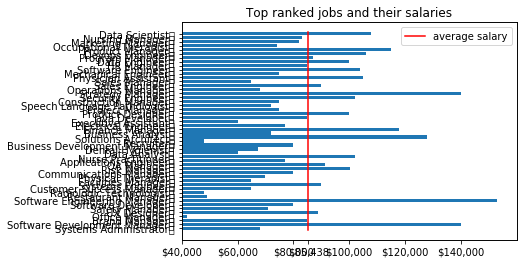

In [5]:
# mean values
avgSalary = sum(salaries)/numberOfJobs
avgRating = sum(ratings)/numberOfJobs
avgJobOpening = sum(jobOpenings)/numberOfJobs

# xTicks parameters for salary
minSalary = 40000
maxSalary = 160000
salaryInterval = 20000

# xTicks2 parameters for ratings
minRating = 3.25
maxRating = 5
ratingInterval = 0.25

xPos = np.arange(0, numberOfJobs)

plt.figure(1)
plt.barh(xPos, list(reversed(salaries)))  # to make the top-ranked job at the top
plt.yticks(xPos, list(reversed(jobs)))

ax = plt.twinx()
ax.plot([avgSalary for i in range(numberOfJobs)], xPos, color='r', label='average salary')
ax.yaxis.set_visible(False)     # set the copied yaxis (which shows 0 - 50) invisible

plt.xlim([minSalary, maxSalary])
# xTicks is for salaries
xTicks = sorted(np.append(np.arange(minSalary, maxSalary, salaryInterval), avgSalary))
plt.xticks(xTicks, [num2dollar(x) for x in xTicks])
plt.xlabel('Salary')
plt.ylabel('Ranked jobs in order')
plt.title('Top ranked jobs and their salaries')
plt.legend()
plt.show()

In the second bargraph, we analyze the correlation of the ratings.

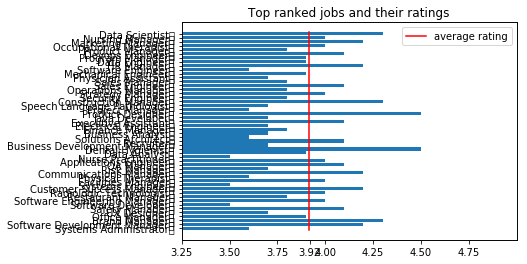

In [6]:
plt.figure(2)
plt.barh(xPos, list(reversed(ratings)))
plt.yticks(xPos, list(reversed(jobs)))

ax2 = plt.twinx()
ax2.plot([avgRating for i in range(numberOfJobs)], xPos, color='r', label='average rating')
ax2.yaxis.set_visible(False)

# xTicks2 is for ratings
xTicks2 = sorted(np.append(np.arange(minRating, maxRating, ratingInterval), avgRating))
xTicks2 = [round(xTicks2[i],2) for i in range(len(xTicks2))] 

plt.xlabel('Ratings')
plt.ylabel('Ranked jobs in order')
plt.xticks(xTicks2)
plt.xlim([minRating, maxRating])
plt.title('Top ranked jobs and their ratings')
plt.legend()
plt.show()

The data we used to model the above two graphs were ranked Glassdoor, and it has many different factors. Now, we want to ask the question: what is the highest-paying/rated job out of these? In the graph below, we purely rank the jobs based on their salaries/ratings. 

**Note:** In these cases, we also get ascending values in sorted lists, i.e. lowest salary/rating will be at index 0. Therefore, we do not have to reverse the lists in this case since the bar graph will plot the first item (lowest) at the bottom.

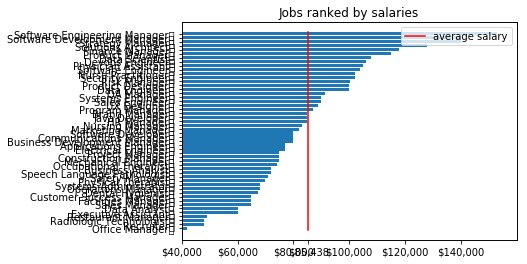

In [7]:
# store the jobs and their salaries/ratings as dictionaries
salaryDict = {}
ratingDict = {}

# sorted outcomes
jobs_sorted_by_salary = []
salaries_sorted = []
ratings_sorted = []

for job in jobs:
    salaryDict[job] = salaries[jobs.index(job)]

# array reference is faster this way
for job in jobs:
    ratingDict[job] = ratings[jobs.index(job)]

# sorting dictionaries by their items values
salaryDict_sorted = list(sorted(salaryDict.items(), key=lambda kv: kv[1]))
ratingDict_sorted = list(sorted(ratingDict.items(), key=lambda kv: kv[1]))

# store the sorted values in lists
# pair = (job, salary/job)
for pair in salaryDict_sorted:
    jobs_sorted_by_salary.append(pair[0])
    salaries_sorted.append(pair[1])

for pair in ratingDict_sorted:
    ratings_sorted.append(pair[1])


plt.figure(3)
plt.barh(xPos, salaries_sorted)
plt.yticks(xPos, jobs_sorted_by_salary)

ax3 = plt.twinx()
ax3.plot([avgSalary for i in range(numberOfJobs)], xPos, color='r', label='average salary')
ax3.yaxis.set_visible(False)

plt.xlim([minSalary, maxSalary])
plt.xticks(xTicks, [num2dollar(x) for x in xTicks])
plt.xlabel('Salary')
plt.ylabel('Ranked jobs by salaries')
plt.title('Jobs ranked by salaries')
plt.legend()
plt.show()

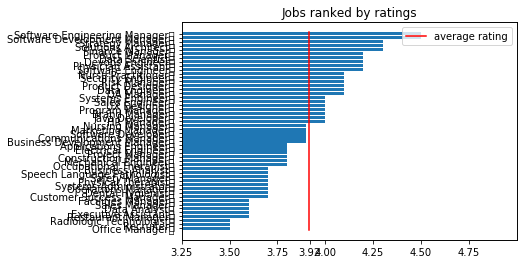

In [8]:
plt.figure(4)
plt.barh(xPos, ratings_sorted)
plt.yticks(xPos, jobs_sorted_by_salary)

ax4 = plt.twinx()
ax4.plot([avgRating for i in range(numberOfJobs)], xPos, color='r', label='average rating')
ax4.yaxis.set_visible(False)

plt.xlabel('Ratings')
plt.ylabel('Ranked jobs by ratings')
plt.xticks(xTicks2)
plt.xlim([minRating, maxRating])
plt.title('Jobs ranked by ratings')
plt.legend()
plt.show()

In this fifth graph, we will once again look at the default top-ranked jobs. However, in this case, each job will be scattered across the plot and scaled by the size of its job openings. The lccation of a dot defines the job's salary based on the x-axis. The size of a dot determine the job openings. The bigger the dot is, the more job openings it currently has on Glassdoor.

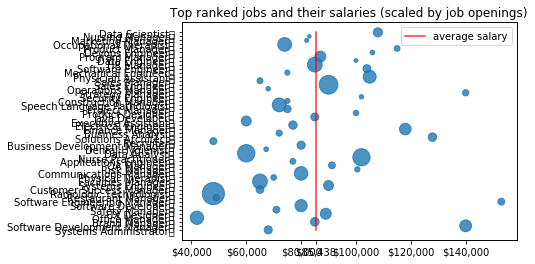

In [9]:
plt.figure(5)
plt.scatter(list(reversed(salaries)), xPos, s=(np.array(jobOpenings)/avgJobOpening) * 100, alpha=0.8)
plt.yticks(xPos, list(reversed(jobs)))
plt.xticks(xTicks, [num2dollar(x) for x in xTicks]) # this is inverted

ax5 = plt.twinx()
ax5.plot([avgSalary for i in range(numberOfJobs)], xPos, color='r', label='average salary', alpha=0.8)
ax5.yaxis.set_visible(False)

plt.ylabel('Top jobs ranked in order (left to right)')
plt.xlabel('Salary')
plt.title('Top ranked jobs and their salaries (scaled by job openings)')
plt.legend()
plt.show()